In [21]:
import pandas as pd
import seaborn as sns
from pycaret.classification import *

In [2]:
train = pd.read_csv("../data/minseok_EDA2_train.csv")
test = pd.read_csv("../data/minseok_EDA2_test.csv")

In [3]:
print(train.shape)
print(test.shape)

(15000, 69)
(35452, 68)


In [4]:
train.head()

,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,Q10,...,hand,religion,orientation,voted,married,familysize,ASD,nerdiness,Qs_Mach,age_cat
0,0.219430,0.684909,0.645424,0.689224,0.270300,0.580272,0.649525,0.664648,0.287443,0.462615,...,0.550968,0.567721,0.617225,0.549084,0.560104,0.547405,0.54676,1,3.653846,0.559000
1,0.549147,0.490676,0.505430,0.576165,0.538382,0.754382,0.494185,0.537294,0.460687,0.462615,...,0.552290,0.597924,0.521066,0.562683,0.515796,0.547405,0.54676,1,3.269231,0.523114
2,0.549147,0.684909,0.645424,0.576165,0.490014,0.754382,0.649525,0.664648,0.541905,0.523798,...,0.552290,0.597924,0.600253,0.549084,0.529865,0.547405,0.54676,1,3.692308,0.523114
3,0.549147,0.490676,0.505430,0.382335,0.538382,0.427424,0.435168,0.664648,0.460687,0.523798,...,0.550968,0.565894,0.521066,0.549084,0.560104,0.565604,0.54676,1,3.500000,0.564478
4,0.549147,0.490676,0.505430,0.576165,0.490014,0.427424,0.494185,0.413060,0.460687,0.523798,...,0.550968,0.567721,0.521066,0.549084,0.560104,0.573536,0.54676,0,3.461538,0.564478


In [5]:
train.columns

Index(['Q1', 'Q2', 'Q3', 'Q4', 'Q5', 'Q6', 'Q7', 'Q8', 'Q9', 'Q10', 'Q11',
       'Q12', 'Q13', 'Q14', 'Q15', 'Q16', 'Q17', 'Q18', 'Q19', 'Q20', 'Q21',
       'Q22', 'Q23', 'Q24', 'Q25', 'Q26', 'introelapse', 'testelapse',
       'surveyelapse', 'TIPI1', 'TIPI2', 'TIPI3', 'TIPI4', 'TIPI5', 'TIPI6',
       'TIPI7', 'TIPI8', 'TIPI9', 'TIPI10', 'VCL1', 'VCL2', 'VCL3', 'VCL4',
       'VCL5', 'VCL6', 'VCL7', 'VCL8', 'VCL9', 'VCL10', 'VCL11', 'VCL12',
       'VCL13', 'VCL14', 'VCL15', 'VCL16', 'education', 'urban', 'gender',
       'engnat', 'hand', 'religion', 'orientation', 'voted', 'married',
       'familysize', 'ASD', 'nerdiness', 'Qs_Mach', 'age_cat'],
      dtype='object')

In [6]:
from pycaret.classification import *

In [7]:
clf = setup(data = train, target = 'nerdiness', use_gpu=True)

,Description,Value
0,session_id,7959
1,Target,nerdiness
2,Target Type,Binary
3,Label Encoded,None
4,Original Data,"(15000, 69)"
5,Missing Values,True
6,Numeric Features,49
7,Categorical Features,19
8,Ordinal Features,False
9,High Cardinality Features,False


In [8]:
best_5 = compare_models(sort = 'AUC', n_select = 5)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
et,Extra Trees Classifier,0.7733,0.8589,0.8403,0.7729,0.8051,0.5353,0.5381,0.7960
rf,Random Forest Classifier,0.7741,0.8549,0.8448,0.7716,0.8065,0.5364,0.5397,0.6800
catboost,CatBoost Classifier,0.7574,0.8292,0.8287,0.7585,0.7920,0.5024,0.5054,2.8980
xgboost,Extreme Gradient Boosting,0.7616,0.8273,0.8133,0.7714,0.7918,0.5134,0.5145,1.0010
lightgbm,Light Gradient Boosting Machine,0.7534,0.8199,0.8215,0.7569,0.7878,0.4946,0.4971,0.7530
gbc,Gradient Boosting Classifier,0.7312,0.8023,0.8075,0.7360,0.7700,0.4483,0.4512,2.2810
lda,Linear Discriminant Analysis,0.7276,0.7968,0.7928,0.7380,0.7643,0.4426,0.4443,0.0820
lr,Logistic Regression,0.7276,0.7964,0.7930,0.7379,0.7644,0.4425,0.4443,0.3920
ada,Ada Boost Classifier,0.7217,0.7919,0.8031,0.7266,0.7629,0.4281,0.4314,0.5060
nb,Naive Bayes,0.6929,0.7453,0.7475,0.7147,0.7306,0.3739,0.3746,0.0160


In [9]:
tuned_best_5 = [tune_model(i) for i in best_5]

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.7238,0.7882,0.8496,0.7110,0.7741,0.4259,0.4372
1,0.7257,0.7974,0.8274,0.7213,0.7707,0.4334,0.4398
2,0.7114,0.7763,0.8479,0.6986,0.7660,0.3986,0.4115
3,0.7276,0.7791,0.8359,0.7202,0.7737,0.4363,0.4440
4,0.7362,0.8001,0.8479,0.7251,0.7817,0.4535,0.4624
5,0.7486,0.8118,0.8615,0.7336,0.7925,0.4788,0.4888
6,0.7438,0.8029,0.8581,0.7297,0.7887,0.4688,0.4788
7,0.7486,0.8291,0.8513,0.7378,0.7905,0.4802,0.4879
8,0.7333,0.7818,0.8598,0.7175,0.7823,0.4454,0.4577
9,0.7178,0.8008,0.8462,0.7061,0.7698,0.4129,0.4242


In [10]:
tuned_best_5

[ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0,
                      class_weight='balanced_subsample', criterion='entropy',
                      max_depth=7, max_features='sqrt', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0002,
                      min_impurity_split=None, min_samples_leaf=2,
                      min_samples_split=10, min_weight_fraction_leaf=0.0,
                      n_estimators=260, n_jobs=-1, oob_score=False,
                      random_state=7959, verbose=0, warm_start=False),
 RandomForestClassifier(bootstrap=False, ccp_alpha=0.0,
                        class_weight='balanced_subsample', criterion='entropy',
                        max_depth=7, max_features='sqrt', max_leaf_nodes=None,
                        max_samples=None, min_impurity_decrease=0.0002,
                        min_impurity_split=None, min_samples_leaf=2,
                        min_samples_split=10, min_weight_fraction_leaf=0.0,
         

In [11]:
blended = blend_models(estimator_list = best_5, method = 'soft')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.7686,0.8409,0.8479,0.7631,0.8032,0.5242,0.5285
1,0.7705,0.8598,0.8376,0.7704,0.8026,0.5296,0.5322
2,0.7648,0.8419,0.8530,0.7561,0.8016,0.5153,0.5210
3,0.7590,0.8399,0.8256,0.7618,0.7925,0.5064,0.5087
4,0.7867,0.8613,0.8376,0.7916,0.8140,0.5644,0.5657
5,0.7876,0.8718,0.8462,0.7882,0.8162,0.5655,0.5675
6,0.7857,0.8610,0.8513,0.7830,0.8157,0.5608,0.5636
7,0.7952,0.8782,0.8427,0.8003,0.8210,0.5822,0.5833
8,0.7686,0.8376,0.8427,0.7655,0.8023,0.5248,0.5284
9,0.7703,0.8579,0.8376,0.7704,0.8026,0.5290,0.5316


In [12]:
pred_holdout = predict_model(blended)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Voting Classifier,0.7621,0.8374,0.7644,0.7918,0.7778,0.5219,0.5222


In [13]:
final_model = finalize_model(blended)

In [14]:
predictions = predict_model(final_model, data = test)

In [15]:
submission = pd.read_csv("../data/sample_submission.csv")

In [16]:
submission.head()

,index,nerdiness
0,0,-1
1,1,-1
2,2,-1
3,3,-1
4,4,-1


In [17]:
submission['nerdiness'] = predictions['Label']

In [18]:
submission['nerdiness'].nunique()

2

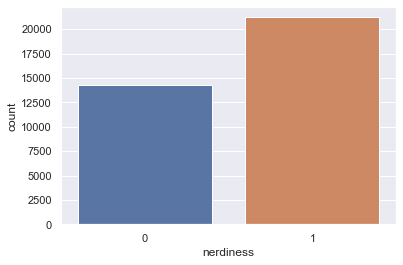

In [19]:
sns.set_theme(style="darkgrid")
ax = sns.countplot(x="nerdiness", data=submission)

In [20]:
submission.to_csv('../submission/auto_minseok3.csv', index = False)